# Unit 5 - Financial Planning

In [3]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

In [5]:
# Get the API key using os.getenv

alpaca_api_key = os.getenv('alpaca_api_key')
alpaca_secret_key = os.getenv('alpaca_secret_key')

In [6]:
# Confirm retrieval of API key
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

<class 'str'>
<class 'str'>


In [7]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [8]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

shares_data = {
    "Portfolio": [1.2, 5.3]
}

# Set the tickers
tickers = ["BTC", "ETH"]

# Create the shares DataFrame with `tickers` as index
df_shares = pd.DataFrame(shares_data, index=tickers)

In [9]:
# Display shares data
df_shares

,Portfolio
BTC,1.2
ETH,5.3


In [10]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=AUD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=AUD"

In [11]:
# Fetch current BTC price
# YOUR CODE HERE!

my_btc_value = requests.get(btc_url).json()
my_btc_value

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18969156,
   'total_supply': 18969156,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 39084.0,
     'volume_24h': 14300201430,
     'market_cap': 742728642703,
     'percentage_change_1h': 0.055278906728456,
     'percentage_change_24h': -0.820830125571682,
     'percentage_change_7d': -2.75833336667535,
     'percent_change_1h': 0.055278906728456,
     'percent_change_24h': -0.820830125571682,
     'percent_change_7d': -2.75833336667535}},
   'last_updated': 1645922051}},
 'metadata': {'timestamp': 1645922051,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [12]:
# Fetch current ETH price
# YOUR CODE HERE!

my_eth_value = requests.get(eth_url).json()
my_eth_value

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 119745993,
   'total_supply': 119745993,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2774.63,
     'volume_24h': 11667032195,
     'market_cap': 333260542252,
     'percentage_change_1h': -0.281586826852518,
     'percentage_change_24h': -0.677235854052527,
     'percentage_change_7d': 0.204397500336357,
     'percent_change_1h': -0.281586826852518,
     'percent_change_24h': -0.677235854052527,
     'percent_change_7d': 0.204397500336357}},
   'last_updated': 1645922056}},
 'metadata': {'timestamp': 1645922056,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [13]:
# Compute current value of my crpto

btc_price_USD = my_btc_value['data']['1']['quotes']['USD']['price']
print(f"Bitcoin Price USD = ${btc_price_USD} USD")
btc_price_AUD = btc_price_USD / .70
print(f"Bitcoin Price AUD = ${btc_price_AUD} AUD")
my_btc_portfolio_USD = my_btc * btc_price_USD
my_btc_portfolio_AUD = my_btc * btc_price_AUD

eth_price_USD = my_eth_value['data']['1027']['quotes']['USD']['price']
print(f"Etherium Price USD = ${eth_price_USD} USD")
eth_price_AUD = eth_price_USD / .70 
print(f"Etherium Price AUD = ${eth_price_AUD} AUD")
my_eth_portfolio_USD = my_eth * eth_price_USD
my_eth_portfolio_AUD = my_eth * eth_price_AUD

Bitcoin Price USD = $39084.0 USD
Bitcoin Price AUD = $55834.28571428572 AUD
Etherium Price USD = $2774.63 USD
Etherium Price AUD = $3963.757142857143 AUD


In [14]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_portfolio_USD:0.2f} USD")
print(f"The current value of your {my_eth} ETH is ${my_eth_portfolio_USD:0.2f} USD")
print(f"The current value of your {my_btc} BTC is ${my_btc_portfolio_AUD:0.2f} AUD")
print(f"The current value of your {my_eth} ETH is ${my_eth_portfolio_AUD:0.2f} AUD")

The current value of your 1.2 BTC is $46900.80 USD
The current value of your 5.3 ETH is $14705.54 USD
The current value of your 1.2 BTC is $67001.14 AUD
The current value of your 5.3 ETH is $21007.91 AUD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [15]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [16]:
## Set Alpaca API key and secret
## YOUR CODE HERE!

alpaca_api_key = os.getenv('alpaca_api_key')
alpaca_secret_key = os.getenv('alpaca_secret_key')


#Test API
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

<class 'str'>
<class 'str'>


In [17]:
# Format current date as ISO format
# YOUR CODE HERE!

start_date = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-30", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df


C:\Users\antho\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:22: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead


In [18]:
# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-07-14 00:00:00-04:00  118.58  118.74  118.58  118.655  3611959  313.30   
2020-07-15 00:00:00-04:00  118.50  118.70  118.50  118.635  3108307  322.41   
2020-07-16 00:00:00-04:00  118.83  118.89  118.74  118.790  3215937  319.79   
2020-07-17 00:00:00-04:00  118.94  118.99  118.77  118.860  2451388  321.88   
2020-07-20 00:00:00-04:00  119.03  119.06  118.91  118.980  3453764  321.43   

                                                               
                             high      low    close    volume  
time                                                           
2020-07-14 00:00:00-04:00  319.76  312.000  318.890  79292036  
2020-07-15 00:00:00-04:00  323.04  319.265  321.865  75854842  
2020-07-16 00:00:00-04:00  321.28  319.090  320.810  47848514  
2020-07-17 00:00:00-04:00  322.57  319.735  321.670  53682925  
2020-07-20 00:00:00-04:00  325.13  320.620  324.360  48315472

In [19]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = df_portfolio["AGG"]["close"].tail(1).sum()
spy_close_price = df_portfolio["SPY"]["close"].tail(1).sum()

In [20]:
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.12
Current SPY closing price: $476.15


In [21]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23807.50
The current value of your 200 AGG shares is $22824.00


### Savings Health Analysis

In [22]:
# Set monthly household income
# YOUR CODE HERE!

monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!

total_crypto_value = my_btc_portfolio_AUD + my_eth_portfolio_AUD
total_share_value = my_spy_value + my_agg_value
total_portfolio = total_crypto_value + total_share_value

In [23]:
                          
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame({'Amount': [total_crypto_value, total_share_value]},
                  index=['total_crypto_value', 'total_share_value'])

In [24]:
# Display savings DataFrame
display(df_savings)

,Amount
total_crypto_value,88009.055714
total_share_value,46631.500000


<AxesSubplot:title={'center':'Crypto & Stocks Portfolio Composition'}, ylabel='Amount'>

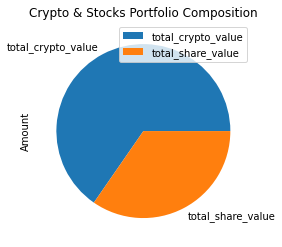

In [25]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="Amount", title="Crypto & Stocks Portfolio Composition")

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

total_savings = total_crypto_value + total_share_value

# Validate saving health
# YOUR CODE HERE!

if total_savings > emergency_fund:
    print(f"Congratulations! Your total savings is greater than your emergency fund requirements! You are safe!")
else:
    print(f"Your total savings is less than your emergency fund! Take action now to become safe!")

Congratulations! Your total savings is greater than your emergency fund requirements! You are safe!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [27]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Display sample data
df_stock_data.tail()

C:\Users\antho\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:10: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  # Remove the CWD from sys.path while we load stuff.


AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2021-04-26 00:00:00-04:00  114.74  114.8015  114.65  114.65  2867784.0   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.37  114.37  3421667.0   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.20  114.44  6185936.0   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.09  114.37  5796983.0   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.33  114.50  5160765.0   

                              SPY                                        
                             open    high       low   close      volume  
time                                                                     
2021-04-26 00:00:00-04:00  417.44  418.22  416.8111  417.64  44689009.0  
2021-04-27 00:00:00-04:00  417.91  418.14  416.3000  417.48  45962264.0  
2021-04-28 00:00:00-04:00  417.81  419.01  416.9000  417.35  45533863.0  
2021-04-29 00:00:00-04:00  420.33  420.72  416.4400  419.99  70607144.0  
2021-04-30 00:00:00-04:00  417.63  418.54  416.3400  417.30  73129109.0

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [30]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\antho\Fintech-API\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991459,1.013734,1.006688,1.005506,0.998258,1.014604,1.009984,1.007867,1.006483,0.999276,...,0.997620,0.993613,1.009424,0.990889,1.005869,0.997952,0.994617,1.006599,0.992677,0.995243
2,0.996320,1.025667,1.017865,1.004047,0.986012,1.017398,1.010850,0.995435,0.996634,0.988294,...,0.980712,0.992958,1.013571,0.977832,1.027389,0.991790,0.998753,1.007457,0.999150,0.997899
3,0.988882,1.021347,1.023125,1.011129,0.986768,1.007032,1.012868,1.007120,0.987944,0.980991,...,0.981500,0.998208,1.024055,0.996900,1.024362,0.989779,0.996271,1.020462,1.004651,0.998727
4,0.999763,1.008304,1.020835,1.011870,0.998736,1.016714,1.013235,0.996429,0.990911,0.974844,...,0.972421,0.993810,1.032341,0.998320,1.017464,0.995332,0.986991,1.008478,0.996092,1.000217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,107.415620,6.452429,70.755938,21.545852,21.990286,23.878050,19.841014,11.892656,7.430329,11.898764,...,24.410657,75.855570,19.208788,13.704842,16.408237,4.409136,18.291652,18.546458,31.179046,18.571867
7557,108.563679,6.514122,70.679720,21.342341,22.177691,24.074542,19.820581,11.843641,7.413905,11.768866,...,24.421571,75.448612,19.006218,13.666548,16.428371,4.469807,18.263700,18.876061,30.966449,18.588271
7558,108.616902,6.474426,70.104783,21.230172,21.963657,24.080839,19.920632,11.930820,7.318744,11.835762,...,24.506580,75.912423,19.021877,13.669394,16.130059,4.453564,18.421824,18.940372,30.683538,18.643311
7559,106.811609,6.471783,70.020253,21.121101,21.928998,24.160908,19.767150,11.980798,7.386023,11.851928,...,24.397458,76.409953,19.018823,13.748900,15.959595,4.489187,18.677116,19.019792,30.935184,18.843340


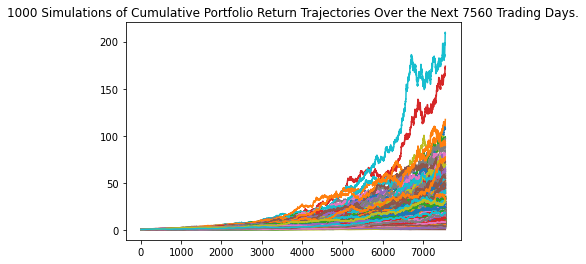

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_even_dist.plot_simulation()

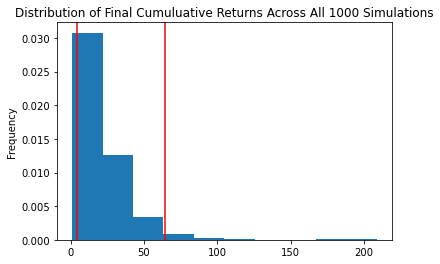

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

summary_stats = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_stats)

count           1000.000000
mean              21.688864
std               17.411427
min                0.963914
25%               10.882328
50%               16.898753
75%               27.067623
max              208.577136
95% CI Lower       4.575231
95% CI Upper      64.002502
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [43]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${20000} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86092.67 and $1334052.44


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [44]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower = round(summary_stats[8]*initial_investment_2,2)
ci_upper = round(summary_stats[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $129139.01 and $2001078.66


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_5.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_even_dist_5.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist_5.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!


# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [352]:
# Set initial investment
# YOUR CODE HERE!
intial_investment_3 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower = round(summary_stats[8]*intial_investment_3,2)
ci_upper = round(summary_stats[9]*intial_investment_3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${intial_investment_3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_lower}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $6438994.96 and $6438994.96


### Ten Years Retirement Option

In [343]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*10
)

In [346]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\antho\usyd-syd-fin-pt-12-2021-u-c\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995556,0.995980,1.007868,0.999261,1.002579,1.001405,1.002775,0.994500,0.992016,1.011566,...,1.001526,1.002851,0.993194,1.013802,1.007833,0.994488,1.008373,0.992841,0.998182,0.998867
2,0.997943,0.995879,1.009513,0.994197,0.993149,1.003997,1.009175,1.003371,0.993138,1.012920,...,0.993485,0.998653,1.000735,1.021426,1.019850,0.990994,1.014370,1.001547,0.996607,0.993120
3,1.001013,0.991365,1.000798,0.995746,0.995149,1.003387,1.011107,0.999111,0.993202,1.011780,...,0.987475,0.992582,1.003701,1.027874,1.021252,1.001190,1.006835,0.989742,0.988748,0.992766
4,1.002449,1.008341,1.007720,0.989591,0.996016,1.007357,1.009776,1.000140,0.988266,1.008329,...,0.980491,0.992236,1.008298,1.032192,1.033757,1.004128,1.003776,0.994594,0.973494,0.989522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.126954,8.110938,5.793478,4.614930,5.236015,6.818619,9.036088,6.814146,8.466787,6.699669,...,7.487722,7.039720,6.272810,5.695784,5.538250,6.034283,8.420209,9.127164,8.083448,7.411588
2517,6.132072,8.116844,5.835477,4.617953,5.257212,6.840003,9.070135,6.790203,8.470144,6.724656,...,7.492540,7.106074,6.268907,5.676323,5.532262,6.042287,8.423464,9.097317,8.129376,7.425703
2518,6.084297,8.111256,5.795259,4.598662,5.222324,6.821301,9.077706,6.779761,8.531988,6.661950,...,7.514605,7.112136,6.220320,5.616378,5.561351,6.064632,8.373388,9.190427,8.029339,7.509611
2519,6.159280,8.012512,5.819542,4.567344,5.203281,6.762344,9.078309,6.789985,8.512403,6.713299,...,7.546979,7.211807,6.174286,5.630969,5.589051,6.057838,8.444153,9.205715,8.058098,7.472256


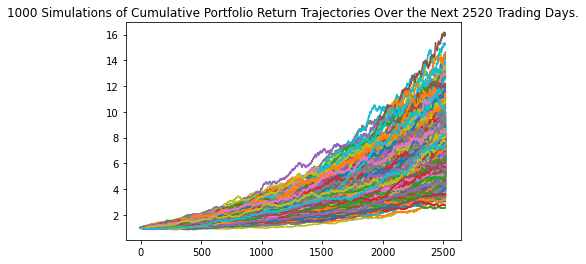

In [347]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_even_dist_10.plot_simulation()

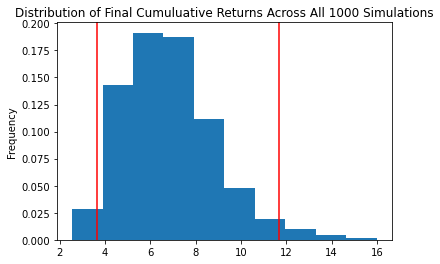

In [348]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist_10.plot_distribution()

In [350]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

summary_stats_1 = MC_even_dist_10.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary_stats_1)

count           1000.000000
mean               6.842683
std                2.032889
min                2.553734
25%                5.312864
50%                6.652770
75%                8.004647
max               15.983826
95% CI Lower       3.658333
95% CI Upper      11.666973
Name: 2520, dtype: float64


In [355]:
# Set initial investment
# YOUR CODE HERE!

intial_investment_60000 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_ten = round(summary_stats[8]*intial_investment_60000,2)
ci_upper_ten = round(summary_stats[9]*intial_investment_60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${intial_investment_60000} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $6438994.96 and $44376748.24
